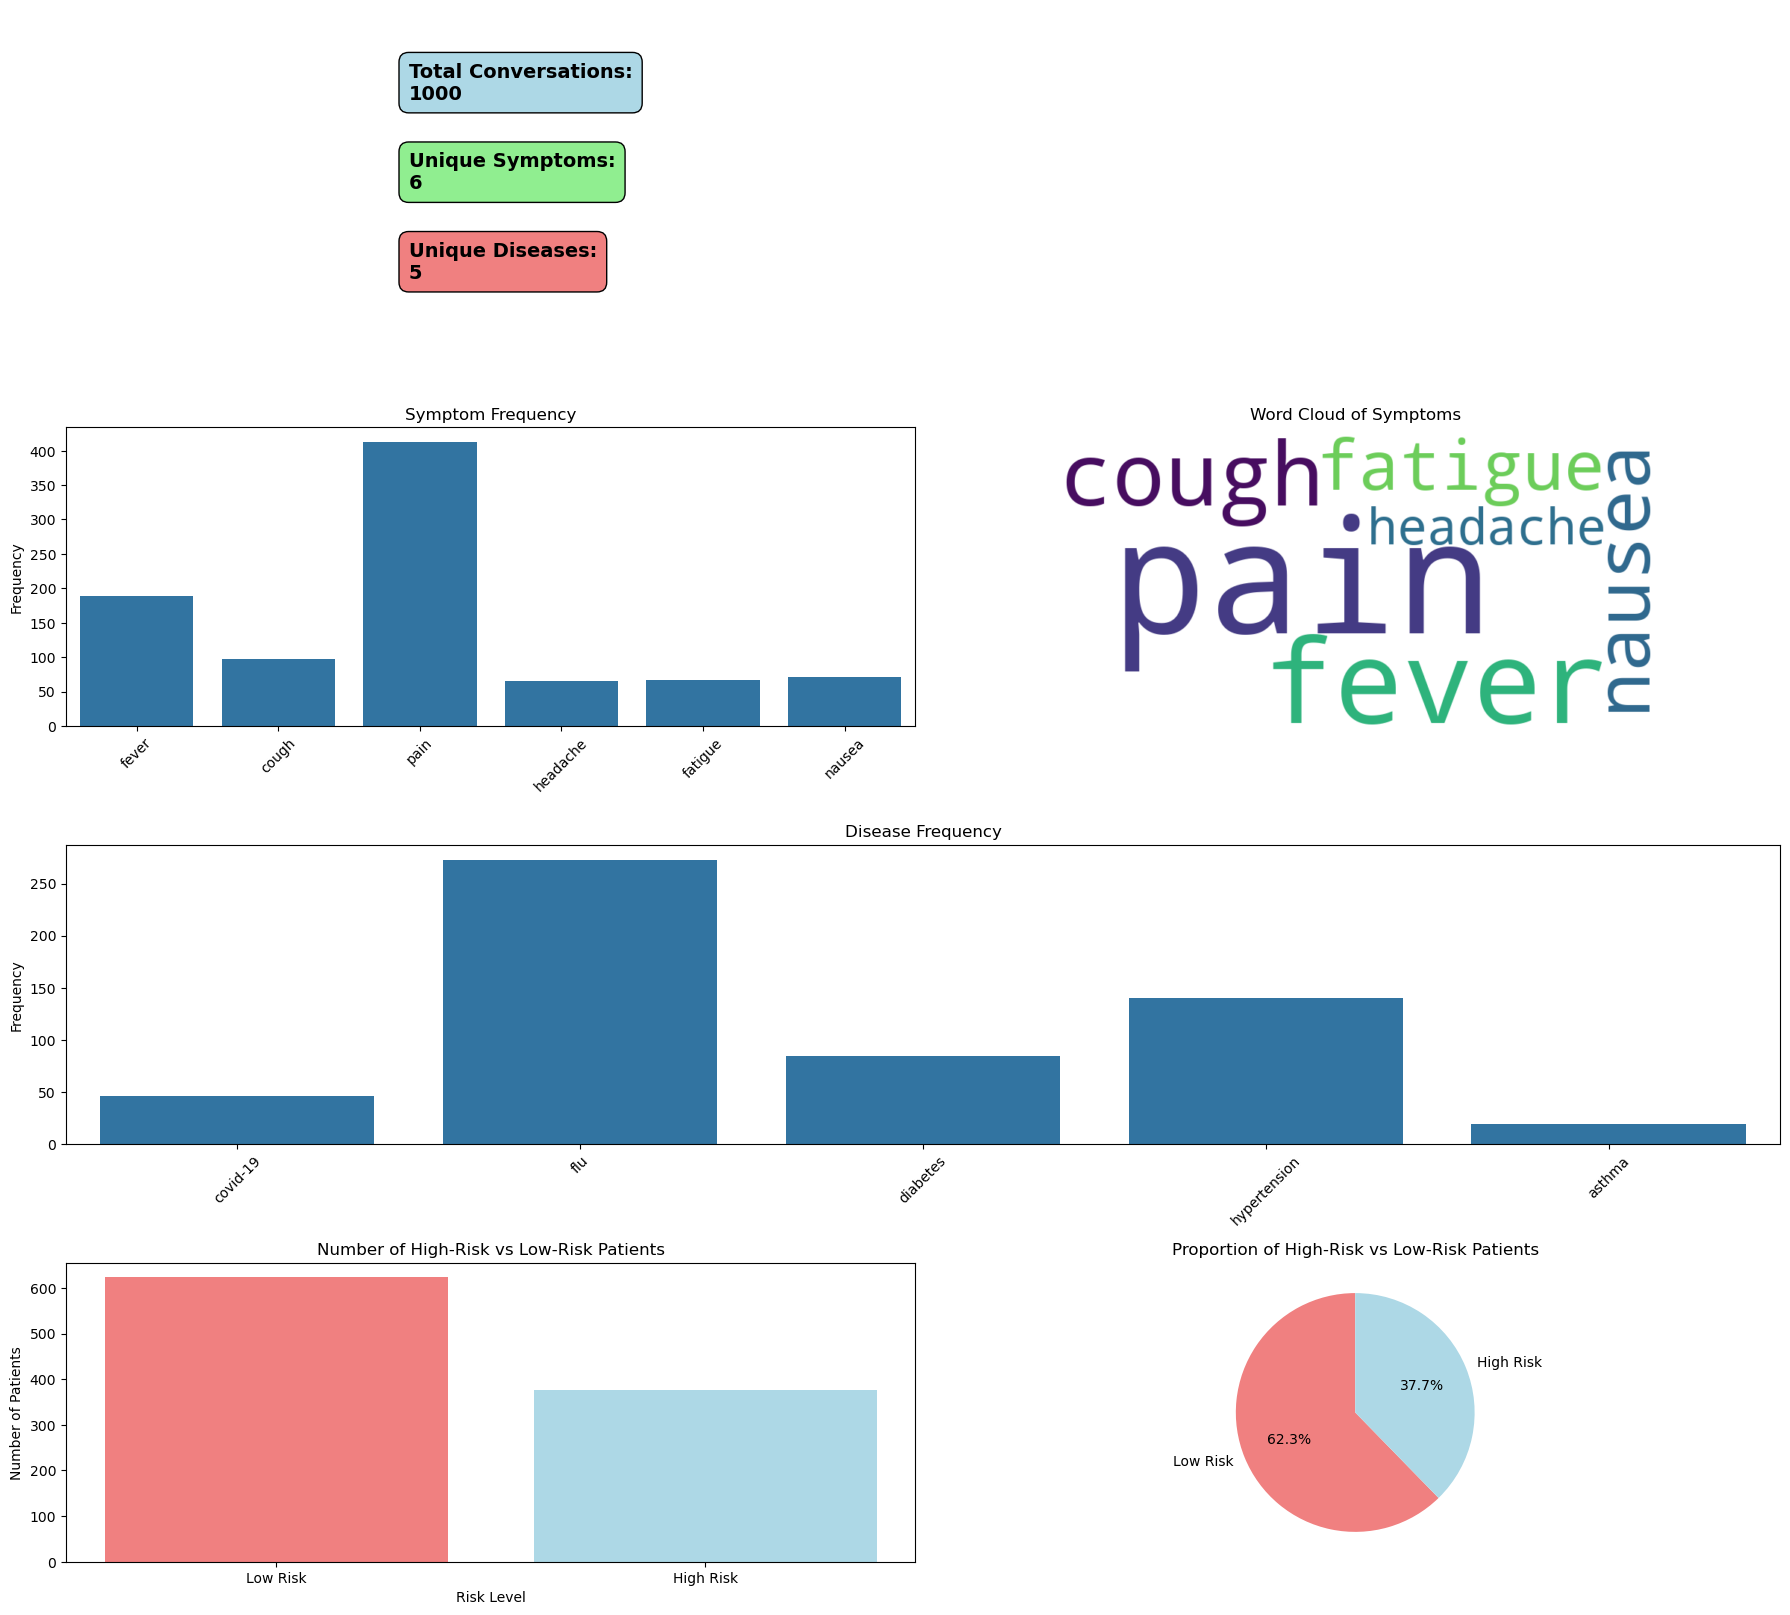

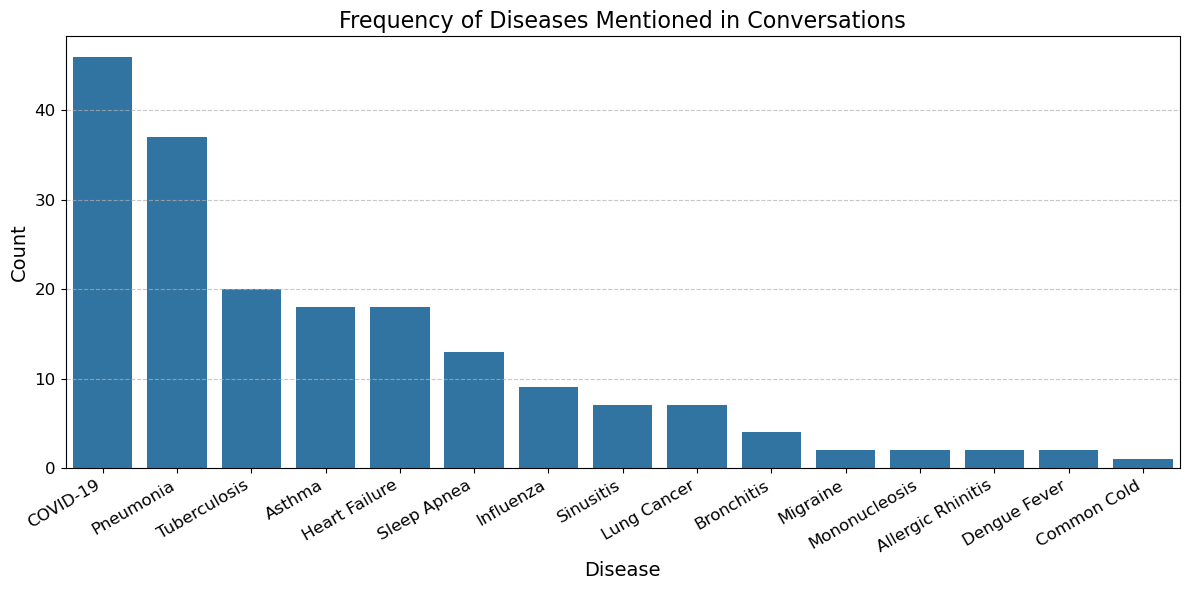

In [54]:
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Define necessary functions
def extract_symptoms(text):
    symptoms_keywords = ['fever', 'cough', 'pain', 'headache', 'fatigue', 'nausea']
    text = text.lower()
    symptoms = [word for word in symptoms_keywords if word in text]
    return symptoms

def extract_diseases(text):
    diseases_keywords = ['covid-19', 'flu', 'asthma', 'diabetes', 'hypertension']
    text = text.lower()
    diseases = [word for word in diseases_keywords if word in text]
    return diseases

def tokenize_text(text):
    return re.findall(r'\b\w+\b', text)

def remove_stopwords(tokens):
    stopwords = set(['and', 'or', 'the', 'is', 'in', 'to', 'of', 'a'])
    return [token for token in tokens if token not in stopwords]

def lemmatize_text(tokens):
    return tokens  # Placeholder for actual lemmatization

def word_freq(tokens_list):
    flat_list = [word for tokens in tokens_list for word in tokens]
    return Counter(flat_list)

def generate_word_cloud(word_counts):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud')
    plt.show()

def ner(tokens):
    return []  # Placeholder for actual NER logic

def classify_risk(symptoms, diseases):
    """
    Classifies risk level based on symptoms and diseases.
    - High risk: Severe symptoms (e.g., 'fever', 'fatigue') or critical diseases (e.g., 'covid-19', 'diabetes').
    - Low risk: Mild symptoms or no critical diseases.
    """
    high_risk_symptoms = {'fever', 'fatigue'}
    high_risk_diseases = {'covid-19', 'diabetes', 'hypertension'}
    
    if high_risk_symptoms.intersection(symptoms) or high_risk_diseases.intersection(diseases):
        return 'High Risk'
    return 'Low Risk'

# Load dataset
data = pd.read_csv('C:/Users/VISHAL/oneDrive/Desktop/ds.csv').dropna()
data['cleaned_text'] = data['data'].str.lower()

# Extract symptoms and diseases
data['symptoms'] = data['data'].apply(lambda x: extract_symptoms(x))
data['diseases'] = data['data'].apply(lambda x: extract_diseases(x))

# Classify risk level
data['risk_level'] = data.apply(lambda row: classify_risk(row['symptoms'], row['diseases']), axis=1)

# Preprocess text
data['tokens'] = data['cleaned_text'].apply(tokenize_text)
data['filtered_tokens'] = data['tokens'].apply(remove_stopwords)
data['lemmatized_tokens'] = data['filtered_tokens'].apply(lemmatize_text)

# Word Frequency Analysis
word_counts = word_freq(data['lemmatized_tokens'])

# Risk Level Analysis
risk_level_counts = data['risk_level'].value_counts()

# Visualizations
fig = plt.figure(figsize=(18, 20))

# Highlight Boxes
ax1 = plt.subplot2grid((5, 2), (0, 0), colspan=2)
ax1.axis('off')
ax1.text(0.2, 0.7, f"Total Conversations:\n{len(data)}", fontsize=14, weight='bold', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.5'))
ax1.text(0.2, 0.4, f"Unique Symptoms:\n{len(set(symptom for sublist in data['symptoms'] for symptom in sublist))}", fontsize=14, weight='bold', bbox=dict(facecolor='lightgreen', edgecolor='black', boxstyle='round,pad=0.5'))
ax1.text(0.2, 0.1, f"Unique Diseases:\n{len(set(disease for sublist in data['diseases'] for disease in sublist))}", fontsize=14, weight='bold', bbox=dict(facecolor='lightcoral', edgecolor='black', boxstyle='round,pad=0.5'))

# Symptom Frequency
ax2 = plt.subplot2grid((5, 2), (1, 0))
symptom_counts = Counter(symptom for sublist in data['symptoms'] for symptom in sublist)
sns.barplot(x=list(symptom_counts.keys()), y=list(symptom_counts.values()), ax=ax2)
ax2.set_title('Symptom Frequency')
ax2.set_ylabel('Frequency')
ax2.tick_params(axis='x', rotation=45)

# Word Cloud for Symptoms
ax3 = plt.subplot2grid((5, 2), (1, 1))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(symptom_counts)
ax3.imshow(wordcloud, interpolation='bilinear')
ax3.axis('off')
ax3.set_title('Word Cloud of Symptoms')

# Disease Frequency
ax4 = plt.subplot2grid((5, 2), (2, 0), colspan=2)
disease_counts = Counter(disease for sublist in data['diseases'] for disease in sublist)
sns.barplot(x=list(disease_counts.keys()), y=list(disease_counts.values()), ax=ax4)
ax4.set_title('Disease Frequency')
ax4.set_ylabel('Frequency')
ax4.tick_params(axis='x', rotation=45)

# Risk Level Bar Chart
ax5 = plt.subplot2grid((5, 2), (3, 0))
ax5.bar(risk_level_counts.index, risk_level_counts.values, color=['lightcoral', 'lightblue'])
ax5.set_title('Number of High-Risk vs Low-Risk Patients')
ax5.set_xlabel('Risk Level')
ax5.set_ylabel('Number of Patients')

# Risk Level Pie Chart
ax6 = plt.subplot2grid((5, 2), (3, 1))
ax6.pie(risk_level_counts, labels=risk_level_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
ax6.set_title('Proportion of High-Risk vs Low-Risk Patients')


plt.tight_layout()
plt.show()
# Define the list of known diseases
known_diseases = [
    'COVID-19', 'Influenza', 'Pneumonia', 'Common Cold', 'Migraine', 'Tuberculosis',
     'Bronchitis', 'Asthma', 'Mononucleosis',
    'Sinusitis', 'Lung Cancer', 'Allergic Rhinitis', 'Dengue Fever', 'Sleep Apnea',
    'Heart Failure'
]

# Ensure the necessary columns exist in the DataFrame
if 'cleaned_text' in data.columns:
    # Combine relevant columns into a single Series to search for diseases
    combined_text = data['cleaned_text'].fillna('')

    # Count the occurrences of each disease using vectorized operations
    disease_counts = {
        disease: combined_text.str.contains(r'\b' + re.escape(disease) + r'\b', case=False).sum()
        for disease in known_diseases
    }

    # Convert the result into a DataFrame for visualization
    disease_df = pd.DataFrame(list(disease_counts.items()), columns=['Disease', 'Frequency'])

    # Sort the diseases by frequency and pick the top 20
    disease_df_sorted = disease_df.sort_values(by='Frequency', ascending=False).head(20)

    # Plot the frequency of diseases
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Disease', y='Frequency', data=disease_df_sorted)

    # Set plot title and labels with better styling
    plt.title('Frequency of Diseases Mentioned in Conversations', fontsize=16)
    plt.xlabel('Disease', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=30, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

else:
    print("Column 'cleaned_text' is not present in the DataFrame.")
